# Linear Regression

In [1]:
# Import required modules
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create w, b scalars
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [3]:
def forward(x):
    y = w*x + b
    return y

In [4]:
x = torch.tensor([[3], [5]])
forward(x)

tensor([[10.],
        [16.]], grad_fn=<AddBackward0>)

In [5]:
# Define seed
torch.manual_seed(1)
# Create a Linear Model with input size 1, output size 1
model = nn.Linear(in_features=1, out_features=1)
# y = weight * x + bias
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [6]:
# Predict Model output at x = 2.0 and x = 3.3
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


Text(0, 0.5, 'y')

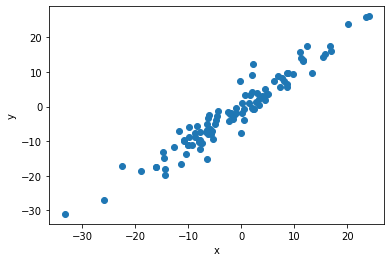

In [7]:
# Create Random Data Points 100 rows, 1 column
X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)
plt.plot(X, y, 'o')
plt.xlabel('x')
plt.ylabel('y')

In [8]:
# Define LR subclass from 'nn.Module' baseclass, so that it will inherit methods/variables from parent class 
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        # Inherit parent method
        super().__init__()
        # Initialize Linear Model
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [9]:
# Initialize Linear Model with input size 1, output size 1 using the Class LR
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [10]:
# Predictions for x values 2.0 and 3.3
x = torch.tensor([[2.0], [3.3]])
print(model.forward(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


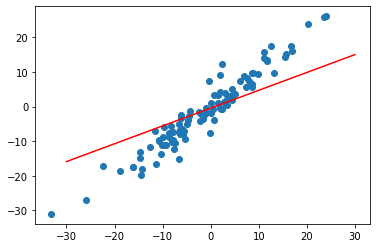

In [11]:
# Get Model Parameters
def get_params():
    [w, b] = model.parameters()
    return (w[0][0].item(), b[0].item())

# Define function to plot
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

plot_fit('Initial Model')

In [14]:
# Define Mean Squared Error as Loss function
criterion = nn.MSELoss()
# Define optimizer using stochastic gradient descent with learning rate 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [15]:
# epochs is the number of passes the data for optimization
epochs = 100
losses = []
for i in range(epochs):
    # Calculate Predictions
    y_pred = model.forward(X)
    # Calculate Losses
    loss = criterion(y_pred, y)
    print('epoch:', i, 'loss:', loss.item())
    losses.append(loss)
    # Recet gradients to zero
    optimizer.zero_grad()
    # Calculate derivatives
    loss.backward()
    # Calculate new parameters (weight, bias)
    optimizer.step()

epoch: 0 loss: 621152960512.0
epoch: 1 loss: 385063223296.0
epoch: 2 loss: 238707179520.0
epoch: 3 loss: 147978600448.0
epoch: 4 loss: 91734441984.0
epoch: 5 loss: 56867733504.0
epoch: 6 loss: 35253268480.0
epoch: 7 loss: 21854099456.0
epoch: 8 loss: 13547726848.0
epoch: 9 loss: 8398463488.0
epoch: 10 loss: 5206348800.0
epoch: 11 loss: 3227503616.0
epoch: 12 loss: 2000784640.0
epoch: 13 loss: 1240320128.0
epoch: 14 loss: 768895488.0
epoch: 15 loss: 476651328.0
epoch: 16 loss: 295484256.0
epoch: 17 loss: 183175680.0
epoch: 18 loss: 113553696.0
epoch: 19 loss: 70393864.0
epoch: 20 loss: 43638352.0
epoch: 21 loss: 27052152.0
epoch: 22 loss: 16770092.0
epoch: 23 loss: 10396067.0
epoch: 24 loss: 6444701.0
epoch: 25 loss: 3995181.75
epoch: 26 loss: 2476684.25
epoch: 27 loss: 1535341.75
epoch: 28 loss: 951787.625
epoch: 29 loss: 590032.1875
epoch: 30 loss: 365774.25
epoch: 31 loss: 226752.78125
epoch: 32 loss: 140571.0625
epoch: 33 loss: 87145.578125
epoch: 34 loss: 54026.1953125
epoch: 35 lo

Text(0.5, 0, 'epoch')

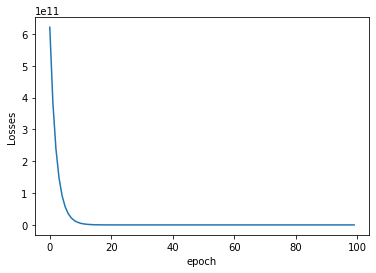

In [16]:
plt.plot(range(epochs), losses)
plt.ylabel('Losses')
plt.xlabel('epoch')

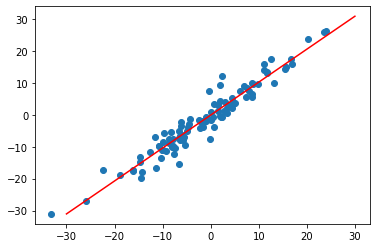

In [17]:
plot_fit('Trained Model')